In [268]:
import pandas as pd
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [269]:
import tensorflow as tf

In [270]:
tf.__version__

'2.18.0'

<Axes: xlabel='Exited'>

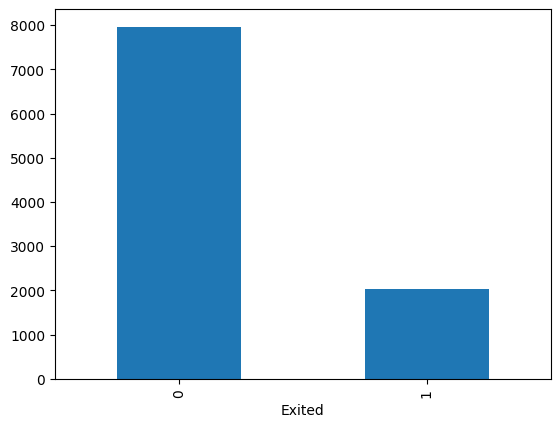

In [271]:
df.Exited.value_counts().plot(kind='bar')

In [272]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [273]:
X=df.drop(labels=['RowNumber','CustomerId','Surname','Exited'],axis=1)
y=df['Exited']

In [274]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [275]:
y


,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [276]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [277]:
X=X.drop(labels=['Geography','Gender'],axis=1)

In [278]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [279]:
X=pd.concat([X,geography,gender],axis=1)

In [280]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [281]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [282]:
# prompt: Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape


(8000, 11)
(2000, 11)
(8000,)


(2000,)

In [283]:
X['Germany']=X['Germany'].astype(int)
X['Spain']=X['Spain'].astype(int)
X['Male']=X['Male'].astype(int)

In [284]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


# FEATURE SCALING

In [285]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [286]:
X_train,X_test

(array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
         -0.57369368,  0.91601335],
        [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
         -0.57369368, -1.09168714],
        ...,
        [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
         -0.57369368,  0.91601335],
        [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
         -0.57369368, -1.09168714]]),
 array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
         -0.57369368, -1.09168714],
        [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
         -0.57369368, -1.09168714],
        [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
          1.74309049, -1.09168714],
        ...,
        [-0.74791227, -0.27319958, -1.37744033, ..., -

In [287]:
X_train.shape

(8000, 11)

# Creating ANN

In [288]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,ELU
from tensorflow.keras.layers import Dropout


In [289]:
classifier=Sequential()

In [290]:
# Input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.3))

In [291]:
# First Hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.4))

In [292]:
# Second Hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [293]:
# Addig output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [294]:
# Compiling the model
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [295]:
import tensorflow as tf
from tensorflow import keras
ealy_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [296]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=ealy_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7554 - loss: 0.6056 - val_accuracy: 0.7955 - val_loss: 0.4995
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7870 - loss: 0.5294 - val_accuracy: 0.7955 - val_loss: 0.4736
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7900 - loss: 0.4933 - val_accuracy: 0.7955 - val_loss: 0.4573
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8013 - loss: 0.4669 - val_accuracy: 0.7955 - val_loss: 0.4516
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7972 - loss: 0.4740 - val_accuracy: 0.7955 - val_loss: 0.4422
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8038 - loss: 0.4618 - val_accuracy: 0.7963 - val_loss: 0.4379
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8018 - loss: 0.4559 - val_accuracy: 0.7952 - val_loss: 0.4336
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8066 - loss: 0.4570 -

In [297]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [298]:
import matplotlib.pyplot as plt

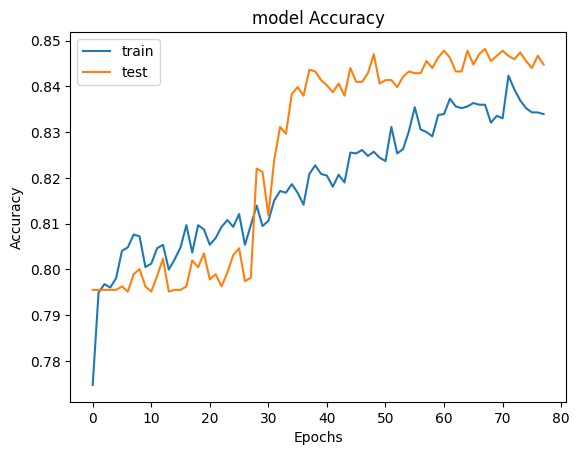

In [299]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

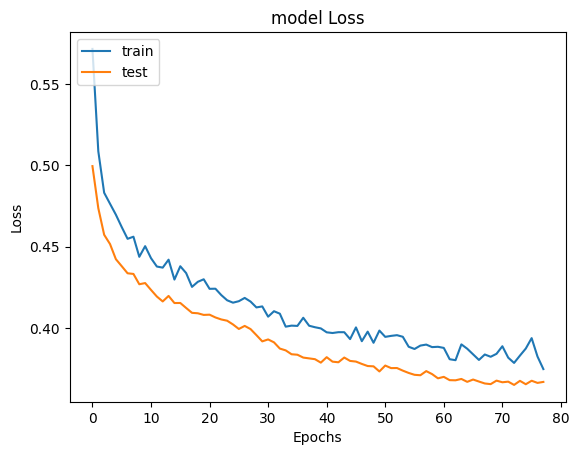

In [300]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')

In [301]:
classifier.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 6)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 815 (3.19 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 544 (2.13 KB)

In [302]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred >=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [303]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_pred,y_test)

In [304]:
cm

array([[1523,   72],
       [ 207,  198]])

In [305]:
score

0.8605

In [306]:
import joblib
joblib.dump(classifier,'churn_model.pkl')
print('model saved successfully')

model saved successfully


In [307]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [308]:
import numpy as np
# Model ko load karna
loaded_model = joblib.load("churn_model.pkl")

# New data ke liye prediction
new_data = [619,42,2,0.00,1,1,1,101348.88,0,0,0] # Example passenger
new_data = np.array(new_data).reshape(1, -1)
prediction = loaded_model.predict(new_data)

print("Survival Prediction:", prediction[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Survival Prediction: [1.]
